In [3]:

def build_hex_edges_rect(rows=14, cols=47):
    """Tres-bolillos en rejilla offset (odd-r). Devuelve N, edges."""
    n_sites = rows * cols
    N = list(range(n_sites))
    E = set()
    for r in range(rows):
        for c in range(cols):
            u = r*cols + c
            # 4 vecinos directos
            cand = [(r, c-1), (r, c+1), (r-1, c), (r+1, c)]
            # 2 diagonales según paridad de fila
            cand += [(r-1, c-1), (r+1, c-1)] if (r % 2 == 0) else [(r-1, c+1), (r+1, c+1)]
            for rr, cc in cand:
                if 0 <= rr < rows and 0 <= cc < cols:
                    v = rr*cols + cc
                    if u < v:
                        E.add((u, v))
    return N, sorted(E)

def build_hex_edges_n(n_sites=658):
    """
    Tres-bolillos vía coordenadas axiales: construye un 'disco' hexagonal
    y recorta para usar EXACTAMENTE n_sites. Devuelve N, edges.
    """
    def hex_count(R): return 1 + 3*R*(R+1)
    # 1) radio mínimo con suficientes celdas
    R = 0
    while hex_count(R) < n_sites: R += 1
    # 2) todas las coords axiales dentro del radio
    coords = []
    for q in range(-R, R+1):
        rmin = max(-R, -q-R)
        rmax = min(R, -q+R)
        for r in range(rmin, rmax+1):
            coords.append((q, r))
    # 3) quedarnos con exactamente n_sites
    coords = coords[:n_sites]
    coord_to_id = {coords[i]: i for i in range(n_sites)}
    N = list(range(n_sites))
    # 4) vecinos axiales (6 direcciones)
    dirs = [(1,0),(1,-1),(0,-1),(-1,0),(-1,1),(0,1)]
    E = set()
    for u in N:
        q,r = coords[u]
        for dq,dr in dirs:
            v = coord_to_id.get((q+dq, r+dr))
            if v is not None and u < v:
                E.add((u, v))
    return N, sorted(E)

# ---------- ELIGE Y CONSTRUYE ----------
# Opción A (exacta rectangular 14x47, sin sobras):
N, edges = build_hex_edges_rect(rows=14, cols=47)

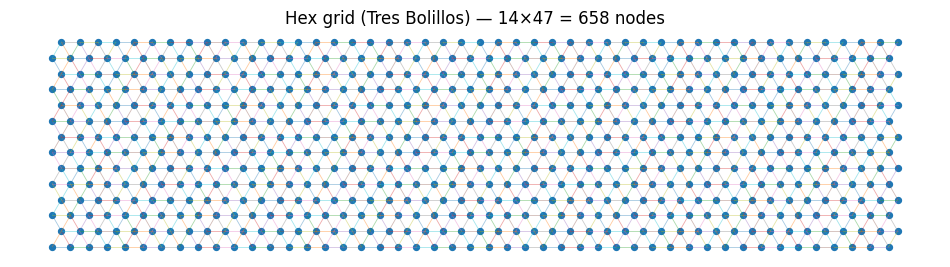

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# --- parámetros del grid ---
rows, cols = 14, 47     # 14 x 47 = 658
spacing = 1.0           # distancia base entre sitios

def hex_positions(rows, cols, spacing=1.0):
    dx = spacing * 0.5
    dy = spacing * np.sqrt(3) / 2
    pts = []
    for r in range(rows):
        for c in range(cols):
            x = c * spacing + (dx if r % 2 else 0.0)  # desplazamiento por paridad
            y = r * dy
            pts.append((x, y))
    return np.array(pts)

def hex_edges(rows, cols):
    E = set()
    for r in range(rows):
        for c in range(cols):
            u = r*cols + c
            # vecinos base
            nbrs = [(r, c-1), (r, c+1), (r-1, c), (r+1, c)]
            # diagonales según paridad de fila
            nbrs += [(r-1, c-1), (r+1, c-1)] if (r % 2 == 0) else [(r-1, c+1), (r+1, c+1)]
            for rr, cc in nbrs:
                if 0 <= rr < rows and 0 <= cc < cols:
                    v = rr*cols + cc
                    if u < v:
                        E.add((u, v))
    return sorted(E)

# --- construir y plotear ---
pos = hex_positions(rows, cols, spacing)
edges = hex_edges(rows, cols)

fig, ax = plt.subplots(figsize=(12, 4.5))
for (u, v) in edges:
    x1, y1 = pos[u]
    x2, y2 = pos[v]
    ax.plot([x1, x2], [y1, y2], lw=0.6, alpha=0.4)

ax.scatter(pos[:, 0], pos[:, 1], s=18)
ax.set_aspect('equal')
ax.axis('off')
ax.set_title(f"Hex grid (Tres Bolillos) — {rows}×{cols} = {rows*cols} nodes")
plt.show()
